<a href="https://colab.research.google.com/drive/1QOitFnH-DepEhCooTH8Yu2-tRvIg6zi8" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การบ้านสัปดาห์ที่ 5
- ความเข้าใจเกี่ยวกับการทำ basic image segmentation จาก color detection, การสร้าง mask และใช้ mask เพื่อให้บรรลุเป้าหมายใน image processing




In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from skimage import io
from skimage.util import img_as_ubyte
from google.colab.patches import cv2_imshow
import urllib.request

## แบบฝึกหัดที่ 5.1
**วัตถุประสงค์**
- การนำความรู้ด้าน color space มาใช้ในการทำ image segmentation

**โจทย์:** ให้นักศึกษาทำการเขียนโปรแกรมเพื่อแสดงผลตามความต้องการดังต่อไปนี้

 1.ตรวจจับรูปเลขาคณิตที่มีสีฟ้า

 2.นำรูปเลขาคณิตสีฟ้าที่ได้มาแสดงผลทางด้านกรอบซ้ายมือของภาพ

 3.ลบภาพเลขาคณิตสีฟ้าที่อยู่ในกรอบด้านซ้ายมือ

**ตัวอย่างภาพผลลัพธ์ที่ต้องการ**

<img align="left" width="400"  src="https://github.com/jbinteam/010723305/blob/main/images/expected_output_week5.png?raw=true">


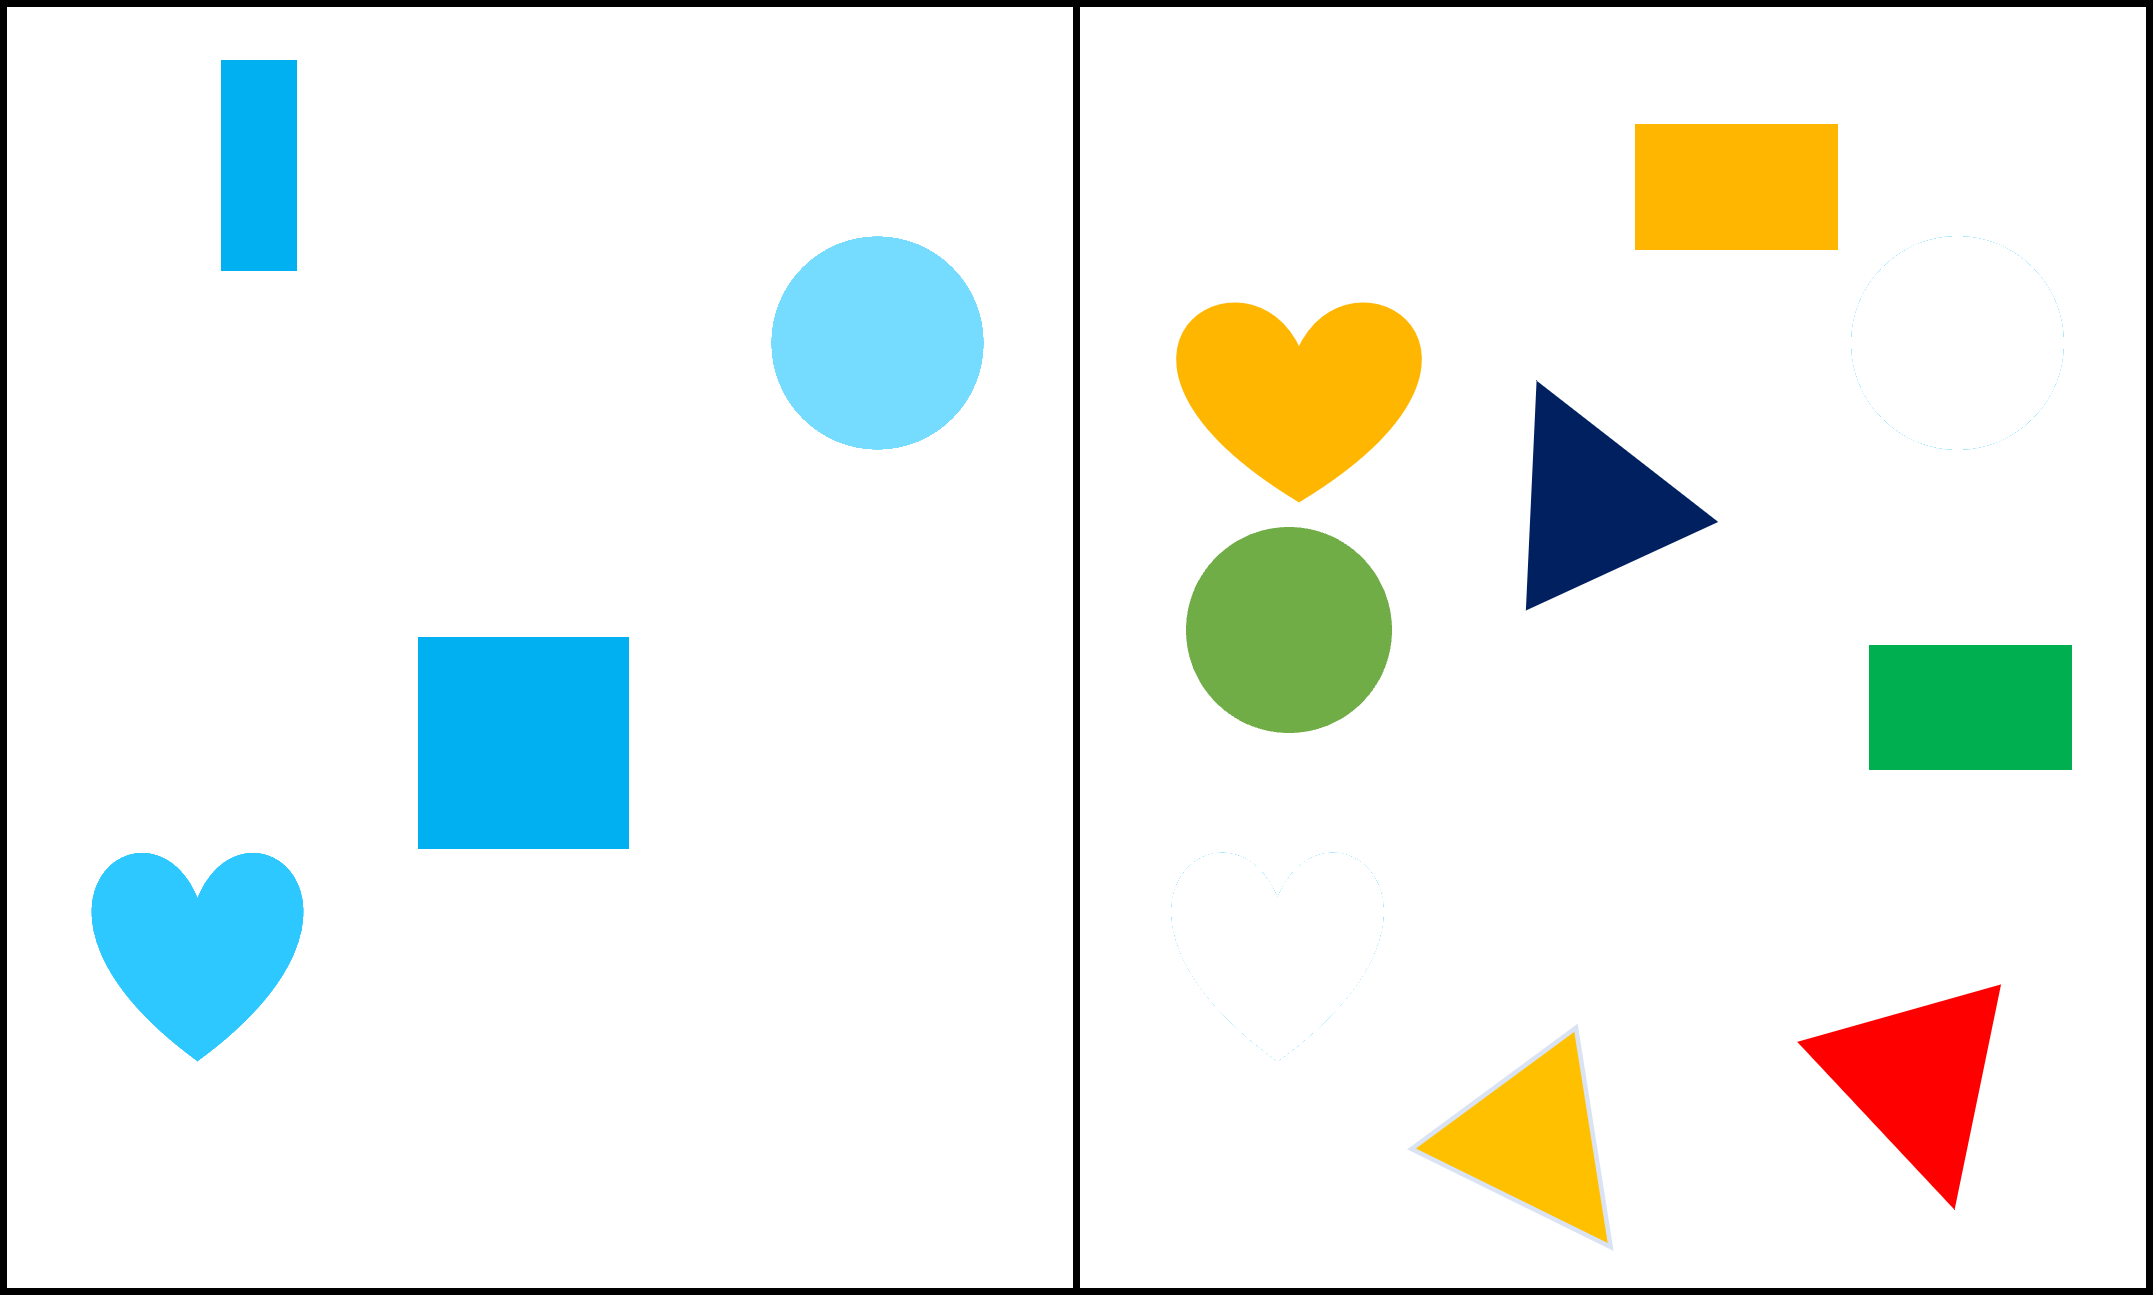

In [2]:
url="https://github.com/jbinteam/010723305/blob/main/images/color_segmentation.png?raw=true"
io_img= io.imread(url)

cv_img = img_as_ubyte(io_img)

img_hsv = cv2.cvtColor(cv_img,cv2.COLOR_RGB2HSV)

#code here
upper_range_blue=np.array([100,255,255]) 
lower_range_blue=np.array([90,100,100]) 
mask = cv2.inRange(img_hsv,lower_range_blue,upper_range_blue)  
output = cv2.bitwise_and(cv_img,cv_img, mask= mask)
mask_indices = np.where(mask==255)
cv_img[mask_indices[0],mask_indices[1]-1080] = cv_img[mask_indices] # move blue2left
cv_img[mask_indices] = 255 # write blue_right to white



bgr_ori_img=cv2.cvtColor(cv_img,cv2.COLOR_RGB2BGR)

cv2_imshow(bgr_ori_img)


## แบบฝึกหัดที่ 5.2
**วัตถุประสงค์**
- การใช้ canny ในการทำ image segmentation

**โจทย์1:** ให้นักศึกษาทำการเขียนโปรแกรมย้าย"ลุง" ไปไว้ที่สถานที่ที่ต้องการ(background ใหม่) โดยด้วยการใช้เทคนิคต่างๆจากบทเรียนที่ผ่านมา ร่วมกับ canny และ findContour

**โจทย์2:** ให้นักศึกษาทำการเขียนโปรแกรมย้าย"ลุง" ไปไว้ที่สถานที่ที่ต้องการ(background ใหม่) โดยด้วยการใช้เทคนิคต่างๆจากบทเรียนที่ผ่านมาร่วมกับ graphcut




In [8]:
url_PM="https://github.com/jbinteam/010723305/blob/main/images/uncleToo.jpg?raw=true"
#เปลี่ยนภาพ bg เพื่อให้ลุงไปอยู่ในที่ที่ต้องการด้วยการเปลี่ยน url ภาพจากโค๊ดด้านล่าง
url_BG="https://lh5.googleusercontent.com/uzQwOwly-nKV2Y16yJCGs_Tm6TtW3vhktDT08CDrZjOI3274_VeufhK_24SxQgJOibb5rMu1kwHt_tQ=w2880-h1470"

#-------------------------------------------------------------------------------------------------------------------------------------------------------------
BG_img=io.imread(url_BG)
PM_img= io.imread(url_PM)
#-------------------------------------------------------------------------------------------------------------------------------------------------------------
#code here
BGgraphcut = BG_img.copy()
PM_crop = PM_img[0:675,200:1100]
PM_gray = cv2.cvtColor(PM_crop,cv2.COLOR_BGR2GRAY)
PM_blur = cv2.GaussianBlur(PM_gray,(5,5),0)
mask = np.zeros(PM_crop.shape[:2],dtype=np.uint8)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------
# graphCut
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (100,0,700,675)
cv2.grabCut(PM_crop,mask,rect,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_RECT)

maskgraphcut = np.where((mask==2)|(mask==0),0,1).astype('uint8')
PM_img = PM_crop*maskgraphcut[:,:,np.newaxis]
maskgraphcut_indices = np.where(maskgraphcut==1)

BGgraphcut[maskgraphcut_indices[0]+330,maskgraphcut_indices[1]+300] = PM_crop[maskgraphcut_indices]
#-------------------------------------------------------------------------------------------------------------------------------------------------------------
# Name and Output
BGgraphcut = cv2.putText(BGgraphcut, '[graphCut]', (10,990), cv2.FONT_HERSHEY_COMPLEX_SMALL, 3, (0,0,0), 2, cv2.LINE_AA)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------
bgr_BG_img=cv2.cvtColor(BGgraphcut,cv2.COLOR_RGB2BGR)

cv2_imshow(bgr_BG_img)
#-------------------------------------------------------------------------------------------------------------------------------------------------------------

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------
BG_img=io.imread(url_BG)
PM_img= io.imread(url_PM)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------
#code here!!!
BGcanny = BG_img.copy()
PM_crop = PM_img[0:675,200:1100]
PM_gray = cv2.cvtColor(PM_crop,cv2.COLOR_BGR2GRAY)
PM_blur = cv2.GaussianBlur(PM_gray,(5,5),0)
mask = np.zeros(PM_crop.shape[:2],dtype=np.uint8)
#-------------------------------------------------------------------------------------------------------------------------------------------------------------
# Canny/findContour
edges = cv2.Canny(PM_blur, 30, 90)
edges = cv2.line(edges,(70,675),(785,675),(255,255,255),2)
kernel = np.ones((5,5),dtype=np.uint8)

gradient = cv2.morphologyEx(edges, cv2.MORPH_GRADIENT, kernel)
closing = cv2.morphologyEx(gradient, cv2.MORPH_CLOSE, kernel)
maskcanny = mask.copy()
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
  cv2.drawContours(maskcanny, contours, i, (255,255,255), -1)

maskcanny_indices = np.where(maskcanny==255)
BGcanny[maskcanny_indices[0]+330,maskcanny_indices[1]+300] = PM_crop[maskcanny_indices]

#-------------------------------------------------------------------------------------------------------------------------------------------------------------
# Name and Output
BGcanny = cv2.putText(BGcanny, '[Canny/findContour]', (10,990), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,0), 2, cv2.LINE_AA)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------
bgr_BG_img=cv2.cvtColor(BGcanny,cv2.COLOR_RGB2BGR)

cv2_imshow(bgr_BG_img)
#-------------------------------------------------------------------------------------------------------------------------------------------------------------

Output hidden; open in https://colab.research.google.com to view.